<a href="https://colab.research.google.com/github/sipocz/messer/blob/main/AIT4_Vizsgafeladat_20210522_Sipocz_Laszlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feladat kiírás: Idősor elemzése**
Az ipari gyakorlatot az időben változó paraméterek jellemzik. Ezen paraméterek figyelése, elemzése pénzben is kifejezhető eredményt produkálhat. Egy ilyen feladat megoldására vállalkoznék az első javaslatomban:

Rendelkezésre áll egy ipari terület nitrogén fogyasztásával kapcsolatos adathalmaz. Az adatok egy Internetes felületről érhetők el. A megoldással kapcsolatos elvárások:
1. Az internetes felületről adatok letöltése (webscaping) technikával.
2. Az adatok feldolgozása, CSV-ben történő tárolása
3. Az adatok elemzése ahol a következő kérdésekre keressük a válaszokat:
    * Az adatok alapján jelezhetünk-e valamilyen kiugró értéket, 
valamilyen hibát, ami alapján emberi beavatkozási igény is felmerül.
    * Az adatok alapján történik-e valamilyen tendenciózus jelenség:
    * Emelkedő fogyasztás
    * Nem szokványos nyomás emelkedés, csökkenés ami a korábbi tapasztalatokból nem látszik. 
    * Lengés megjelenése a rendszerben
4. Felismerhető-e valamilyen összefüggés az adatokban, amivel az esetlegesen hiányzó adat  pótolható, becsülhető. (Soft Sensor)


# Az adatok bemutatása

[Adatforrás](http://telemetry.messer.hu:8080/cgi-bin/rview.exe?Name=Richter1&Password=Messer2&Server=10.24.17.2&Language=hu)

[Egy nap adata: -04-04-](http://telemetry.messer.hu:8080/cgi-bin/rview.exe?Log=..%5C..%5Cppsrv%5CRichter1.txt&Html=Richter1log&MaxRows=15000&Year1=2021&Mon1=4&Day1=4&Hour1=0&Year2=2021&Mon2=4&Day2=4&Hour2=23)

Az adatok elérésehéz vebscaping technikát használtam. A következő fejezet erről szól.

In [74]:
import requests
import pandas as pd
import time
import datetime

from bs4 import BeautifulSoup

def i2str(i):
    i2=str(i)
    if len(i2)<2:
        i2="0"+i2
    return(i2)

confline=   {
            "path":"./",
            "prefix":"Nitrogen"
            }

if "path" in confline:
    path=confline["path"]
if "prefix" in confline:
    prefix=confline["prefix"]

#print(path+prefix)

def getdata(t1,t2):
    #print(t1)
    #print(t2)
    y1=i2str(t1.year)
    m1=i2str(t1.month)
    d1=i2str(t1.day)


    y2=i2str(t2.year)
    m2=i2str(t2.month)
    d2=i2str(t2.day)

    url1="http://telemetry.messer.hu:8080/cgi-bin/rview.exe?Log=..%5C..%5C..%5Cppsrv%5CRichter1.txt&Html=Richter1log&MaxRows="
    url2="10000&Year1="+y1+"&Mon1="+m1+"&Day1="+d1+"&Hour1=0&Year2="+y2+"&Mon2="+m2+"&Day2="+d2+"&Hour2=0"

    url=url1+url2

    fname=path+prefix+y1+m1+d1+".csv"
    result=requests.get(url)
    soup = BeautifulSoup(result.content, 'html.parser')
    allrow=soup.find_all("tr")[:]
    fo  = open(fname, "w",encoding='utf-8')
    for  row in allrow:
        soup2=BeautifulSoup(result.content, 'html.parser')
        allcell=row.find_all("td")[:]
        sumcell=""
        #print("--------------")
        #print(allcell)
        for cell in allcell:
            celltxt=cell.text
            sumcell=sumcell+celltxt+";"

        outstr=sumcell.replace(".",",").replace(";"," ",1).replace(",",".",2).replace("   ","").replace("  ","")
        #print(outstr)

        fo.write(outstr+"\n")

    # Close file
    fo.close()
    return(fname)

dt=datetime.date.today()
t1=dt
dt=datetime.timedelta(days=1) # itt kezdi a letöltést ennyi nappal azelőtt 
tk=t1-dt
fname=""

for i in range(1):  # ennyi napnyi adatot tölt le!! t1 -től kezdődően  Nekünk most csak egy kell! 
    dt=datetime.timedelta(days=1) #egy nap legyen a különbség
    t2=t1+dt
    fname=getdata(t1,t2)
    t1=t2



**5 perces mintavétellel érkeznek az adatok**

In [77]:
import pandas as pd
df=pd.read_csv(fname, sep=";", decimal=",",)
df.drop(columns=["Unnamed: 6"],inplace = True)
print(df.head(5))
print(df.tail(5))
df.describe()

             Dátum Idõ  ...  PSA minőség: [%]
0  2021.04.04 00:02:34  ...            0.1985
1  2021.04.04 00:07:35  ...            0.2257
2  2021.04.04 00:12:35  ...            0.2499
3  2021.04.04 00:17:35  ...            0.2733
4  2021.04.04 00:22:35  ...            0.2944

[5 rows x 6 columns]
               Dátum Idõ  ...  PSA minőség: [%]
283  2021.04.04 23:38:39  ...            0.5729
284  2021.04.04 23:43:39  ...            0.1256
285  2021.04.04 23:48:39  ...            0.1453
286  2021.04.04 23:53:40  ...            0.1745
287  2021.04.04 23:58:40  ...            0.1879

[5 rows x 6 columns]


,LIN tartály menny.: [m3],LIN tartály nyomás: [barg],PSA mennyiség: [m3],PSA nyomás: [barg],PSA minőség: [%]
count,288.000000,288.000000,288.000000,288.000000,288.000000
mean,23405.534722,8.424340,143.651042,7.861111,0.354451
std,382.992306,0.031594,203.625121,0.366281,0.192111
min,22734.000000,8.350000,0.000000,7.400000,0.118100
25%,23047.500000,8.400000,0.000000,7.500000,0.180750
50%,23388.500000,8.430000,0.000000,7.800000,0.326350
75%,23759.000000,8.450000,289.175000,8.200000,0.479675
max,24069.000000,8.480000,624.100000,8.600000,1.026400


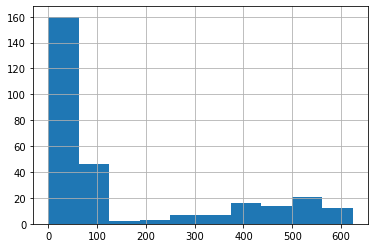

In [80]:
df["PSA mennyiség: [m3]"].hist();